# IPL Win Predictor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
deliveries_df = pd.read_csv('deliveries.csv')
matches_df = pd.read_csv('matches.csv')

In [4]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
deliveries_df.shape

(179078, 21)

In [7]:
matches_df.shape

(756, 18)

## First Target is to filter the reqired data for our model preidiction on both data frames
### Required data from both dataframes for prediction
- 1) batting_team
- 2) bowling_team
- 3) city
- 4) runs_left
- 5) balls_left
- 6) wickets_left
- 7) total_runs_chase
- 8) current_run_rate
- 9) required_run_rate
- 10) result

### Extracting the target score(first innings score) form the total_score_df 

In [8]:
# match wise first and second innings 
total_score_df = (deliveries_df.groupby(['match_id', 'inning']).sum()['total_runs'] + 1).reset_index()
total_score_df

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_2382/3012574217.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = (deliveries_df.groupby(['match_id', 'inning']).sum()['total_runs'] + 1).reset_index()


,match_id,inning,total_runs
0,1,1,208
1,1,2,173
2,2,1,185
3,2,2,188
4,3,1,184
...,...,...,...
1523,11413,2,171
1524,11414,1,156
1525,11414,2,163
1526,11415,1,153


In [9]:
# extracting the target score to chase(first_innings score)
total_score_df = total_score_df[total_score_df['inning'] == 1] 
total_score_df

,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [10]:
# merging total_score with matches dataframe
# now we will use this dataframe

match_df = matches_df.merge(total_score_df[['match_id', 'total_runs']], left_on='id', right_on='match_id')
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158


### There are some teams who does not play now, we need replace their names to current names

In [11]:
# getting all team names
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
# changing the old team names to current names
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [13]:
match_df.shape

(756, 20)

In [14]:
# current ipl teams playing
teams = ['Sunrisers Hyderabad',
         'Mumbai Indians',
         'Royal Challengers Bangalore',
         'Kolkata Knight Riders',
         'Kings XI Punjab',
         'Chennai Super Kings',
         'Rajasthan Royals',
         'Delhi Capitals'
    ]

In [15]:
# keeping only teams which plays present

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [16]:
# number of matches reduced as old teams who are not playing currently were removed
match_df.shape

(641, 20)

In [17]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159


#### Removing dl_applied (duck worth luise) matches for better performance

In [18]:
match_df['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [19]:
# so, there are 15 matches which were dl_applied we will remove them and keep all other
match_df = match_df[match_df['dl_applied'] == 0]
match_df['dl_applied'].value_counts()

0    626
Name: dl_applied, dtype: int64

In [20]:
match_df.shape

(626, 20)

In [21]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159


In [22]:
match_df = match_df[['match_id', 'city', 'total_runs', 'winner']]
match_df.head()

,match_id,city,total_runs,winner
0,1,Hyderabad,208,Sunrisers Hyderabad
4,5,Bangalore,158,Royal Challengers Bangalore
6,7,Mumbai,179,Mumbai Indians
7,8,Indore,149,Kings XI Punjab
9,10,Mumbai,159,Mumbai Indians


In [23]:
# changing the column name from total_runs to target

# match_df['Target'] = match_df['total_runs']
# match_df.drop('total_runs', inplace=True, axis=1)

In [24]:
match_df.head()

,match_id,city,total_runs,winner
0,1,Hyderabad,208,Sunrisers Hyderabad
4,5,Bangalore,158,Royal Challengers Bangalore
6,7,Mumbai,179,Mumbai Indians
7,8,Indore,149,Kings XI Punjab
9,10,Mumbai,159,Mumbai Indians


In [25]:
# merging matches_df with deliveries_df for getting required columns data
delivery_match_df = match_df.merge(deliveries_df, on='match_id')
delivery_match_df.head()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,208,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,208,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,208,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,208,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,208,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [26]:
delivery_match_df.shape

(149578, 24)

In [27]:
# taking only second innings
delivery_match_df = delivery_match_df[delivery_match_df['inning'] == 2]
delivery_match_df

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


#### now we extract take runs_left, balls_left and wickets_left columns data

#### getting current_score

In [28]:
# # total_runs column
delivery_match_df['current_score'] = delivery_match_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_match_df.head()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7


#### runs_left column

In [29]:
delivery_match_df['runs_left'] = delivery_match_df['total_runs_x'] - delivery_match_df['current_score']
delivery_match_df.head()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201


#### balls_left column

In [30]:
delivery_match_df['balls_left'] = 126 - (delivery_match_df['over']*6 + delivery_match_df['ball'])
delivery_match_df

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [31]:
delivery_match_df['player_dismissed'] = delivery_match_df['player_dismissed'].fillna("0")
delivery_match_df['player_dismissed'] = delivery_match_df['player_dismissed'].apply(lambda x : x if x == "0" else "1")
delivery_match_df['player_dismissed'] = delivery_match_df['player_dismissed'].astype('int')
wickets_gone = delivery_match_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_match_df['wickets_left'] = 10 - wickets_gone
delivery_match_df.head(5)

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_2382/717559597.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets_gone = delivery_match_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [32]:
delivery_match_df.tail()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
149573,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
149574,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
149575,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
149576,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4
149577,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-4,0,3


#### current_run_rate column

In [33]:
# current_run_rate = runs/overs(balls played)

delivery_match_df['current_run_rate'] = (delivery_match_df['current_score']*6)/(120 - delivery_match_df['balls_left'])
delivery_match_df.head()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,207,119,10,6.0
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,118,10,3.0
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,117,10,2.0
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,205,116,10,4.5
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,201,115,10,8.4


#### current_run_rate column

In [34]:
delivery_match_df['required_run_rate'] = (delivery_match_df['runs_left'] * 6)/delivery_match_df['balls_left']
delivery_match_df.head()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


#### result column

In [35]:
def winner_result(winners):
    if winners['batting_team'] == winners['winner']:
        return 1
    else:
        return 0

In [36]:
delivery_match_df['result'] = delivery_match_df.apply(winner_result, axis=1)
delivery_match_df.head()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


### Now only taking required columns for devolping model

In [37]:
df_final = delivery_match_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'current_run_rate', 'required_run_rate', 'result']]

In [38]:
df_final.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,required_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.4,10.486957,0


#### Issues solving while devolping model

#### Issue 1

In [39]:
df_final.isnull().sum()

batting_team           0
bowling_team           0
city                 832
runs_left              0
balls_left             0
wickets_left           0
total_runs_x           0
current_run_rate       0
required_run_rate      5
result                 0
dtype: int64

In [40]:
df_final.dropna(inplace=True)

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_2382/433980882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.dropna(inplace=True)


In [41]:
df_final.shape

(71576, 10)

#### Issue 2

In [42]:
# There are infinite values in the required run rate
# infinity only comes when we have no balls left to chase the target

df_final.describe()

,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,required_run_rate,result
count,71576.000000,71576.000000,71576.000000,71576.000000,71576.000000,7.157600e+04,71576.000000
mean,93.383313,62.673159,7.537904,166.767841,7.449324,NaN,0.525246
std,50.058881,33.398497,2.139570,29.291819,2.277979,NaN,0.499366
min,-15.000000,-2.000000,0.000000,66.000000,0.000000,-inf,0.000000
25%,54.000000,35.000000,6.000000,148.000000,6.272727,7.272727e+00,0.000000
50%,93.000000,63.000000,8.000000,166.000000,7.500000,9.000000e+00,1.000000
75%,131.000000,92.000000,9.000000,186.000000,8.696629,1.106422e+01,1.000000
max,250.000000,119.000000,10.000000,251.000000,42.000000,inf,1.000000


In [43]:
# taking only those values where balls left are not zero
df_final = df_final[df_final['balls_left'] != 0]

In [44]:
df_final.describe()

,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,required_run_rate,result
count,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000
mean,93.621065,62.878725,7.553251,166.726963,7.447791,10.568474,0.526646
std,49.957572,33.259471,2.124334,29.294967,2.280498,14.041845,0.499293
min,-15.000000,-2.000000,0.000000,66.000000,0.000000,-516.000000,0.000000
25%,54.000000,35.000000,6.000000,148.000000,6.265782,7.267606,0.000000
50%,93.000000,64.000000,8.000000,166.000000,7.500000,9.000000,1.000000
75%,131.000000,92.000000,9.000000,186.000000,8.696385,11.032258,1.000000
max,250.000000,119.000000,10.000000,251.000000,42.000000,684.000000,1.000000


#### Issue 3

### shuffling the data, so that the bias will not devolped

In [45]:
df_final = df_final.sample(df_final.shape[0])
df_final.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,required_run_rate,result
8459,Rajasthan Royals,Kings XI Punjab,Jaipur,3,11,6,167,9.027523,1.636364,1
86212,Mumbai Indians,Rajasthan Royals,Kolkata,164,118,10,166,6.000000,8.338983,1
111869,Delhi Daredevils,Chennai Super Kings,Raipur,26,38,7,120,6.878049,4.105263,1
10217,Kings XI Punjab,Delhi Daredevils,Chandigarh,152,110,9,159,4.200000,8.290909,1
93896,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,191,107,9,199,3.692308,10.710280,0


In [46]:
df_final.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,required_run_rate,result
1827,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,145,97,10,173,7.304348,8.969072,0


## Model Devlopment

In [47]:
x = df_final.iloc[:, :-1]
y = df_final.iloc[:, -1]

In [48]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=2)

In [49]:
X_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,required_run_rate
52102,Deccan Chargers,Mumbai Indians,Hyderabad,63,21,3,173,6.666667,18.000000
29783,Mumbai Indians,Rajasthan Royals,Durban,136,107,9,146,4.615385,7.626168
10215,Kings XI Punjab,Delhi Daredevils,Chandigarh,157,112,9,159,1.500000,8.410714
78246,Chennai Super Kings,Sunrisers Hyderabad,Chennai,124,97,10,160,9.391304,7.670103
110576,Kolkata Knight Riders,Kings XI Punjab,Kolkata,157,101,10,184,8.526316,9.326733


#### As we have string columns in our data, we need to transform them to numerical variables, so that our model can understand data

#### Transformer (One Hot Encoding)

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer(
    [('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])],
    remainder='passthrough'
)

In [51]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['batting_team', 'bowling_team', 'city'])])

## Pipeline for our model

### Trying different models

### Logistic Regression calculates through sigmoid functions, it gives us the probability between 2 variables(win or loose), so logistic regression works better for this data.

In [52]:
# lets create a pipeline for our model

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_log_reg = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver='liblinear'))
])

In [53]:
from sklearn.ensemble import RandomForestClassifier
pipe_rf = Pipeline(steps=[
    ('step1', trf),
    ('step2', RandomForestClassifier())
])

### Training and Testing the model

In [54]:
pipe_log_reg.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [55]:
from sklearn.metrics import accuracy_score
y_pred_log_reg = pipe_log_reg.predict(x_test)
print('Accuracy_score_log_reg : ',accuracy_score(y_test, y_pred_log_reg) * 100)

Accuracy_score_log_reg :  80.10372135398416


In [56]:
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(x_test)
print('Accuracy_score_rf : ',accuracy_score(y_test, y_pred_rf) * 100)

Accuracy_score_rf :  99.90188520569066


In [57]:
pipe_log_reg.predict_proba(x_test)[23]

array([0.31910674, 0.68089326])

In [58]:
pipe_log_reg

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [59]:
# random forest gives exact result tilt towards one direction(more towards one varible), but we need probabilites
pipe_rf.predict_proba(x_test)[3]

array([0.98, 0.02])

In [60]:
df_final.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,required_run_rate,result
8459,Rajasthan Royals,Kings XI Punjab,Jaipur,3,11,6,167,9.027523,1.636364,1
86212,Mumbai Indians,Rajasthan Royals,Kolkata,164,118,10,166,6.000000,8.338983,1
111869,Delhi Daredevils,Chennai Super Kings,Raipur,26,38,7,120,6.878049,4.105263,1
10217,Kings XI Punjab,Delhi Daredevils,Chandigarh,152,110,9,159,4.200000,8.290909,1
93896,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,191,107,9,199,3.692308,10.710280,0


In [61]:
delivery_match_df.head()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


In [62]:
def match_progression(df,match_id,pipe):
    match = df[df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','current_run_rate','required_run_rate']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [63]:
temp_df,target = match_progression(delivery_match_df, 74, pipe_log_reg)
temp_df

Target- 179


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,55.1,44.9
10467,2,8,0,50.0,50.0
10473,3,1,0,56.8,43.2
10479,4,7,1,68.6,31.4
10485,5,12,0,58.5,41.5
10491,6,13,0,46.2,53.8
10497,7,9,0,40.4,59.6
10505,8,15,0,26.8,73.2
10511,9,7,0,24.7,75.3
10518,10,17,0,13.5,86.5


Text(0.5, 1.0, 'Target to chase- 179')

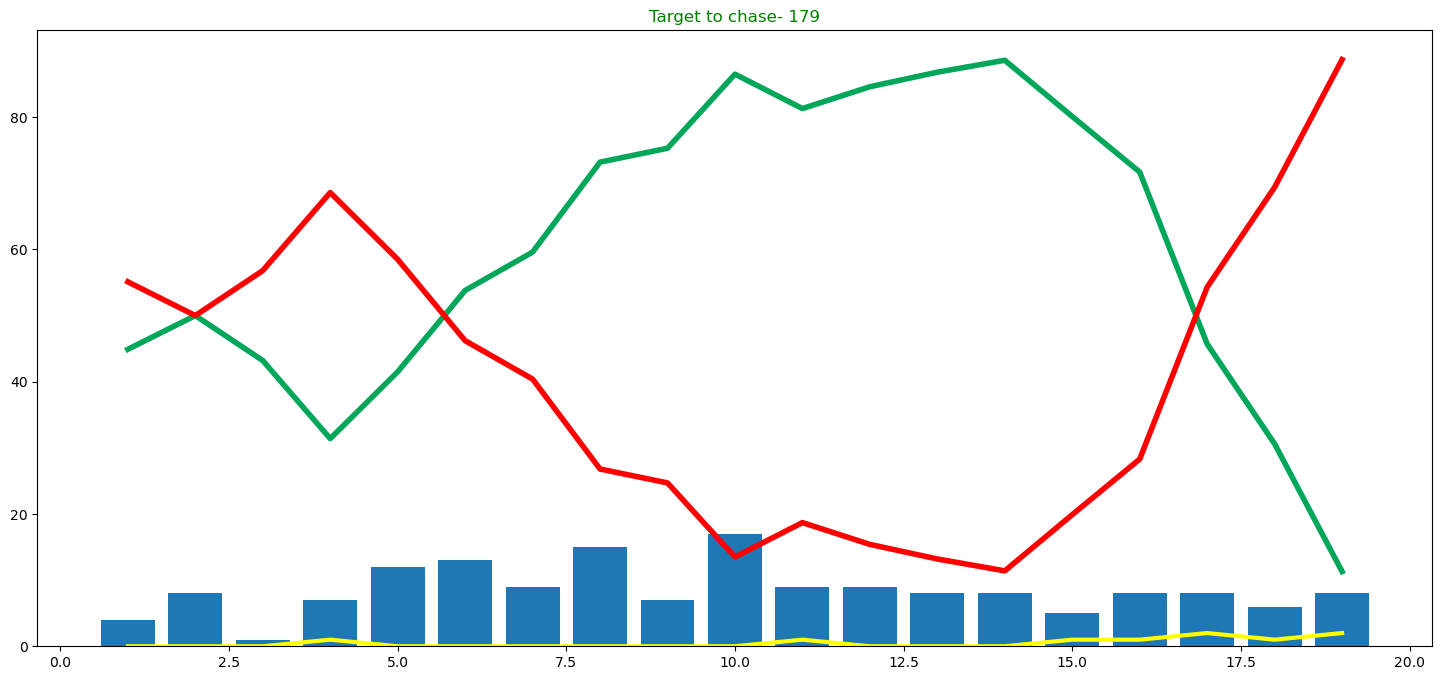

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target to chase- ' + str(target), c='green')

In [65]:
# for dropdown button in the web appication
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [66]:
delivery_match_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [67]:
import pickle
pickle.dump(pipe_log_reg, open('ipl.pkl', 'wb'))

In [68]:
df_final.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'current_run_rate', 'required_run_rate',
       'result'],
      dtype='object')

In [69]:
df_final.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,required_run_rate,result
8459,Rajasthan Royals,Kings XI Punjab,Jaipur,3,11,6,167,9.027523,1.636364,1
86212,Mumbai Indians,Rajasthan Royals,Kolkata,164,118,10,166,6.000000,8.338983,1
111869,Delhi Daredevils,Chennai Super Kings,Raipur,26,38,7,120,6.878049,4.105263,1
10217,Kings XI Punjab,Delhi Daredevils,Chandigarh,152,110,9,159,4.200000,8.290909,1
93896,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,191,107,9,199,3.692308,10.710280,0


### If we want to see season wise ipl match prediciton we can just add year column to our data 

In [70]:
matches_df['Season']

0      IPL-2017
1      IPL-2017
2      IPL-2017
3      IPL-2017
4      IPL-2017
         ...   
751    IPL-2019
752    IPL-2019
753    IPL-2019
754    IPL-2019
755    IPL-2019
Name: Season, Length: 756, dtype: object

In [71]:
df_year = matches_df['Season'].str.split('-', expand=True)
df_year.drop(0, inplace=True)

In [72]:
df_year.drop(0, inplace=True, axis=1)

In [73]:
df_year

,1
1,2017
2,2017
3,2017
4,2017
5,2017
...,...
751,2019
752,2019
753,2019
754,2019


## Displaying the web application output

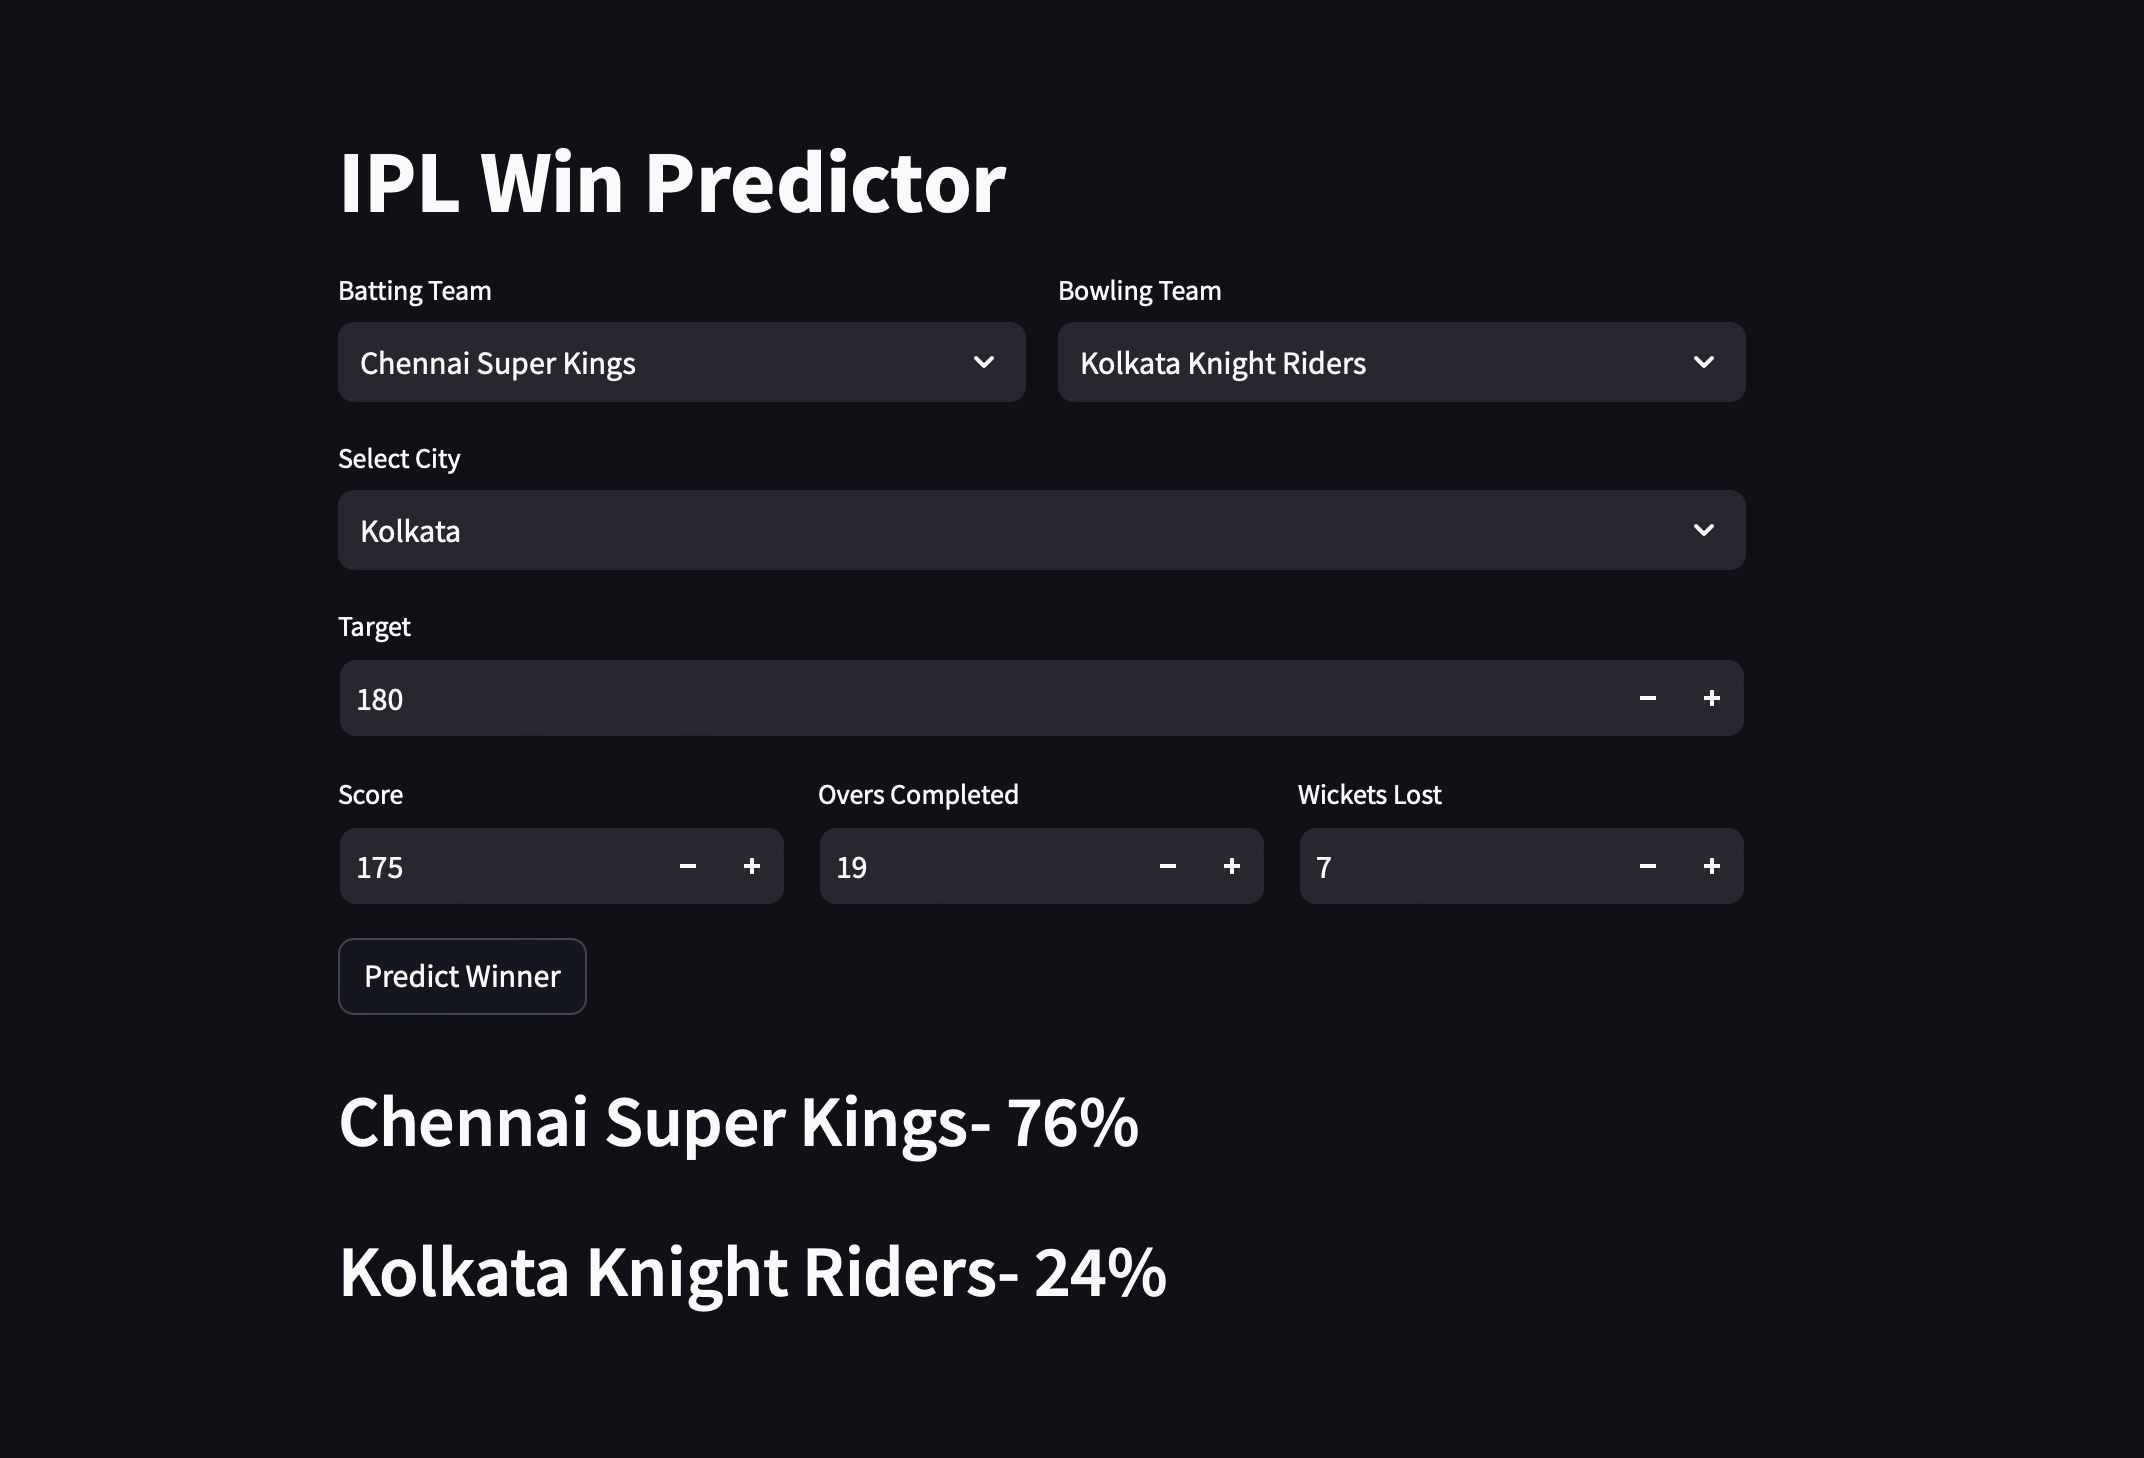

In [74]:
from IPython.display import Image

# Specify the file path of the image
image_path = 'ipl_win_predcitor image.png'

# Display the image
Image(filename=image_path)